# Study on 'Online Shoppers Purchasing Intention Dataset Data Set'

Source : https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset

## Libraries + Setup

In [74]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle 

# set seed for reproducibility
np.random.seed(88)

## Importing DataSet

In [2]:
data_shop = pd.read_csv("online_shoppers_intention.csv",sep=",")
data_shop

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


With this dataset, our goal is to implement ML to find if **a customer will be buy or not, dependind on given attributes.**

Let's look for some info about this dataset.

In [3]:
data_shop.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157213,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [4]:
print('Number of rows:', data_shop.shape[0])
print('Number of columns:',data_shop.shape[1])
print('Columns names :', list(data_shop.columns))

Number of rows: 12330
Number of columns: 18
Columns names : ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']


We have 12330 rows, and 18 colmuns.

In [5]:
data_shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

**The target is 'Revenue'.**

We have **10** numerical attributes :
    - Administrative             
    - Administrative_Duration  
    - Informational             
    - Informational_Duration   
    - ProductRelated           
    - ProductRelated_Duration  
    - BounceRates              
    - ExitRates                
    - PageValues              
    - SpecialDay  
    
We have **8** categorical attributes : 
    - Month                    
    - OperatingSystems        
    - Browser                
    - Region                  
    - TrafficType              
    - VisitorType             
    - Weekend                     
    - Revenue  

In [6]:
missing_val_count_by_column = (data_shop.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Series([], dtype: int64)


We can see that **there is no missing values in our dataset.**

We are not going to use bool variables for ML; we need to convert them in integer.

In [7]:
data_shop['Revenue'] = data_shop['Revenue']*1
data_shop['Weekend'] = data_shop['Weekend']*1
data_shop

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,1,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,1,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,1,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,0,0


## Data Plotting

We're gonna start the data plotting with the numerical attributes

### On numerical attributes

In [8]:
#Creation of a function to show the purcentage in a seaborn countplot.
def without_hue(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 14)
    plt.show()

### 1) Class 'Revenue' Repartition (Repartition of the target values)

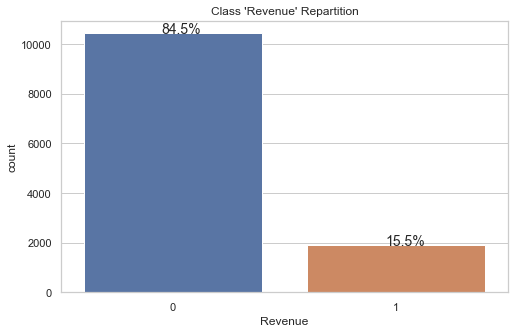

In [9]:
plt.figure(figsize=(8,5))
ax = sns.countplot(data_shop.Revenue)
plt.title("Class 'Revenue' Repartition")

without_hue(ax, data_shop.Revenue)

We see that in our dataset, 84,5% didnt't buy something (0 in the column Revenue)

In [10]:
data_plot_num = data_shop[:]
data_plot_num .Browser = data_shop.Browser.astype("category")
data_plot_num .Region = data_shop.Region.astype("category")
data_plot_num .TrafficType = data_shop.TrafficType.astype("category")
data_plot_num .OperatingSystems = data_shop.OperatingSystems.astype("category")

We transform some attrributes' type in categorys, because they we're categoeries and not simple int. 

In [11]:
numerics = ['int64','float64']
num_col = data_plot_num.select_dtypes(include=numerics).columns
num_col = list(num_col)
num_col

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay']

In [12]:
pivot_on_revenue = data_plot_num.pivot_table(index='Revenue' ,aggfunc=np.mean)
pivot_on_revenue

,Administrative,Administrative_Duration,BounceRates,ExitRates,Informational,Informational_Duration,PageValues,ProductRelated,ProductRelated_Duration,SpecialDay,Weekend
Revenue,,,,,,,,,,,
0,2.117732,73.740111,0.025317,0.047378,0.451833,30.236237,1.975998,28.714642,1069.987809,0.068432,0.227308
1,3.393606,119.483244,0.005117,0.019555,0.786164,57.611427,27.264518,48.210168,1876.209615,0.023166,0.261530


### 2) Mean of the numerical attributes depending on the target 'Revenue'

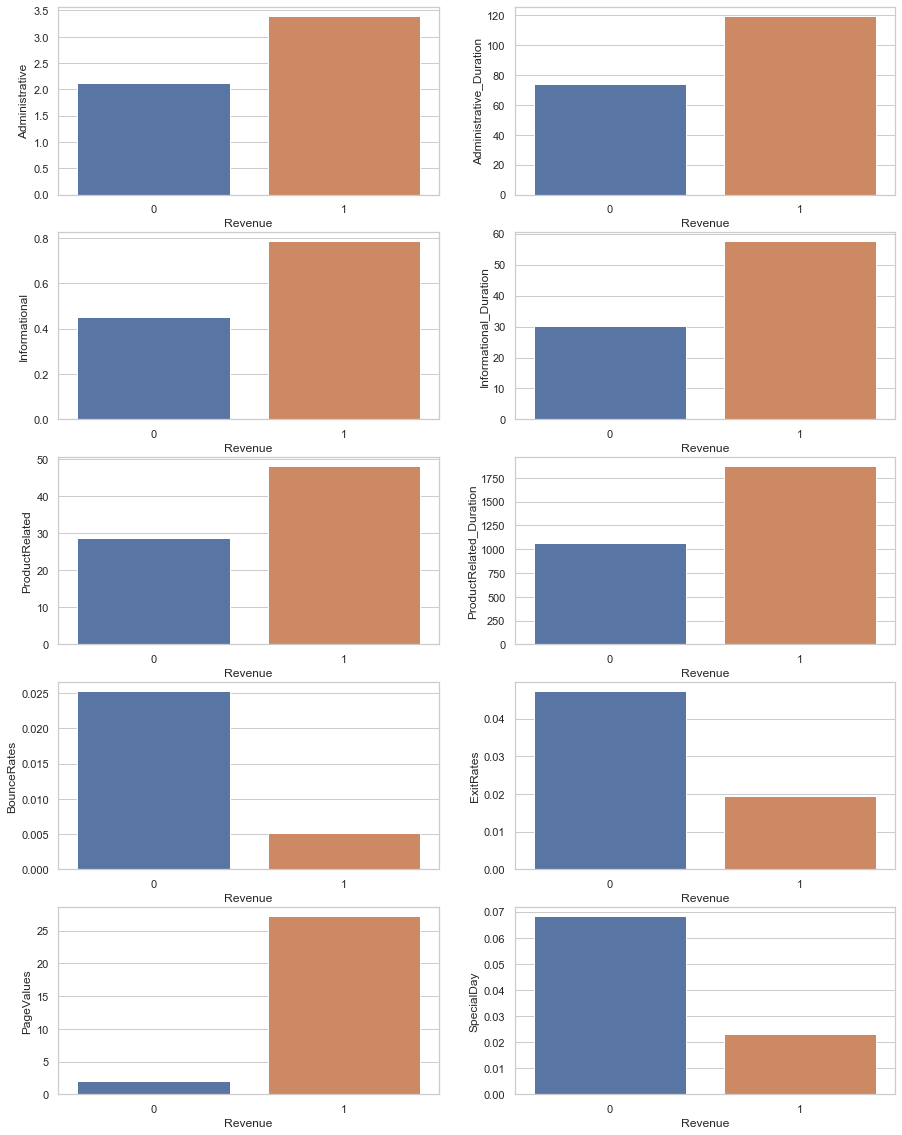

In [13]:
plt.figure(figsize=(15,20))

i = 1
for name in num_col:
    plt.subplot(int(len(num_col))/2,2,i)
    sns.barplot(x = pivot_on_revenue.index, y = pivot_on_revenue[name])
    i+=1

We these plots, we can assume certains things :

- when a customer buy, his admistriation, informational and product_related are higher.
- when the bounces rates and the exit rates are higher, a customere will probably don't buy.
- when the page values is higher, a customer will propably buy.

### 3) Boxplots

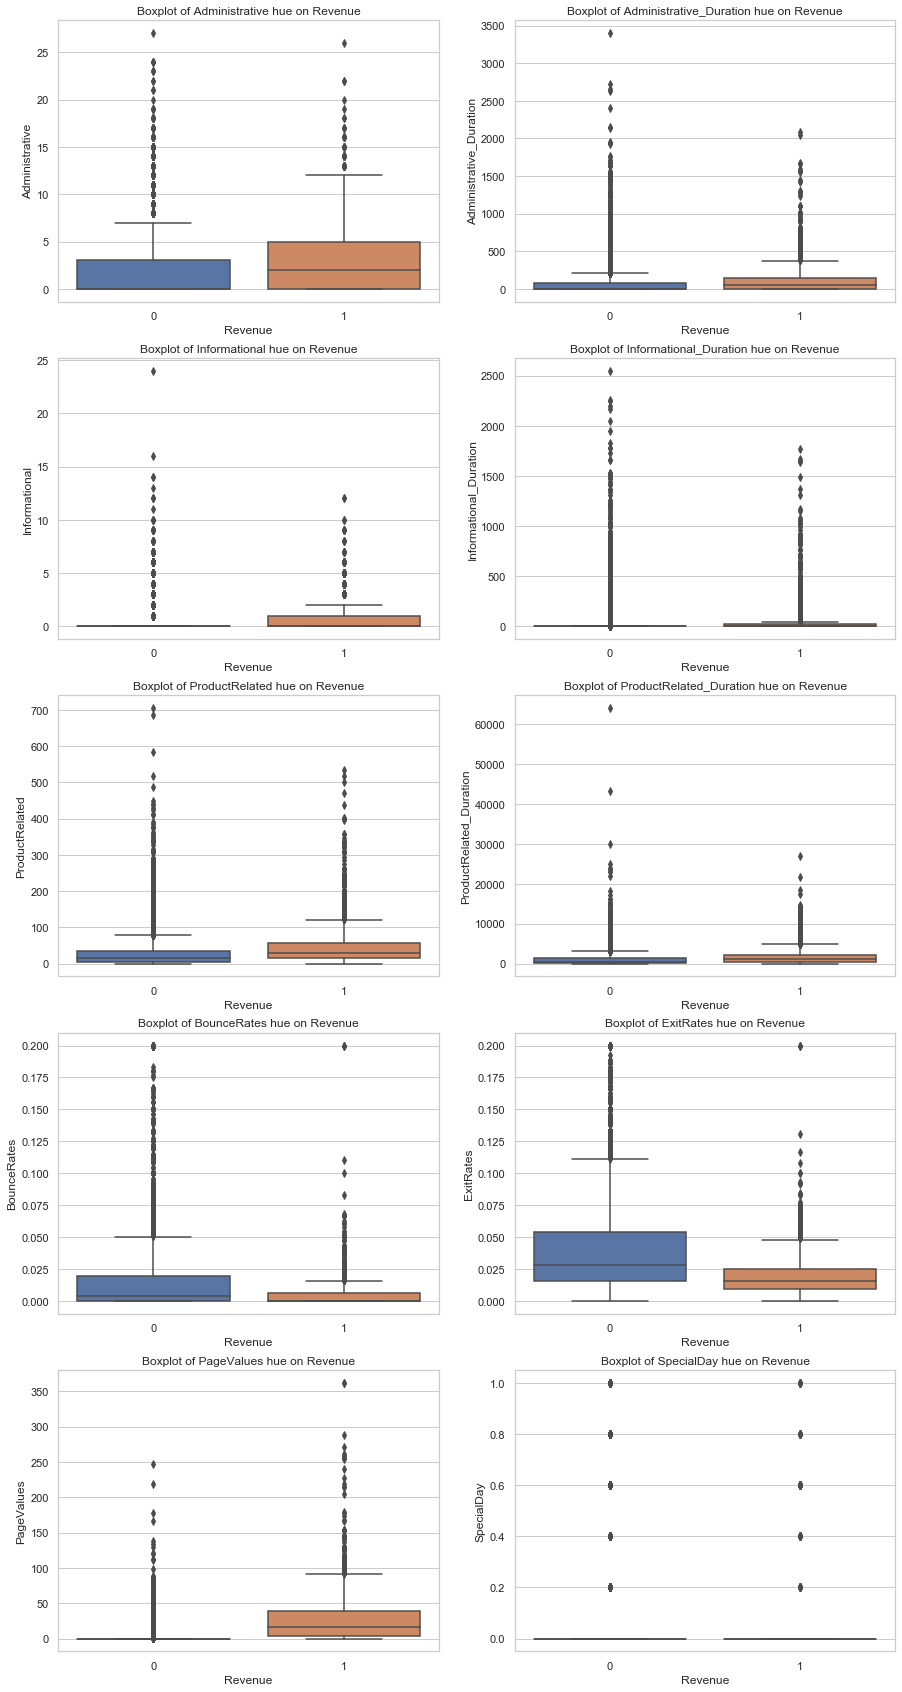

In [14]:
plt.figure(figsize=(15,30))
i = 1
for name in num_col:
    plt.subplot(int(len(num_col))/2,2,i)
    sns.boxplot(data=data_plot_num, x='Revenue',y=name)
    title = "Boxplot of "  + str(name) + " hue on Revenue"
    plt.title(title)
    i+=1

We these boxplots, we can assume certains things :

- the scale are not the same for a lot of attributes, so we're gonna scaled our dataset.
- there are a lot of outliers in each boxplots.
- the boxplots confirm what we saw with the precedents plots !

### 4) Correlation Matrix between all the attributes

We're gonna show the correlation between all the attributes (except Month, because there too many months possible, it
wasn't very useful to show)

Because Month and VisitorType has for type 'Object' (so they're categorical values), we're gonna One-Hot Encode them (creating new columns indicating the presence (or absence) of each possible value in the original data).

In [15]:
data_shop_final = pd.get_dummies(data_shop,columns=['Month','VisitorType'])
data_shop_final.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  int64  
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  int64  
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  OperatingSystems               12330 non-null  int64  
 11  Browser                        12330 non-null  int64  
 12  Region                         12330 non-null 

We drop the Month column, as we say eaerlier, just for the plotting.

In [16]:
col_month = ['Month_Feb','Month_Mar','Month_May','Month_June','Month_Jul','Month_Aug','Month_Sep','Month_Oct','Month_Nov','Month_Dec']
data_shop_without_month= data_shop_final.drop(columns=col_month)
corr=data_shop_without_month.corr(method='pearson')
corr

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561,0.026417,0.138917,0.028449,-0.021184,-0.022884
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376,0.014990,0.093587,0.025043,-0.008542,-0.022525
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491,0.035785,0.095200,-0.053429,-0.021457,0.057399
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675,0.024078,0.070345,-0.043200,-0.013489,0.045501
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064,0.016092,0.158538,-0.122727,-0.036083,0.128738
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377,0.007311,0.152373,-0.116447,-0.027183,0.120489
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286,-0.046514,-0.150673,-0.139351,0.028112,0.129908
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616,-0.062587,-0.207071,-0.183898,0.034763,0.171987
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532,0.012002,0.492569,0.104952,0.055204,-0.115825
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301,-0.016767,-0.082305,-0.082740,-0.025730,0.087123


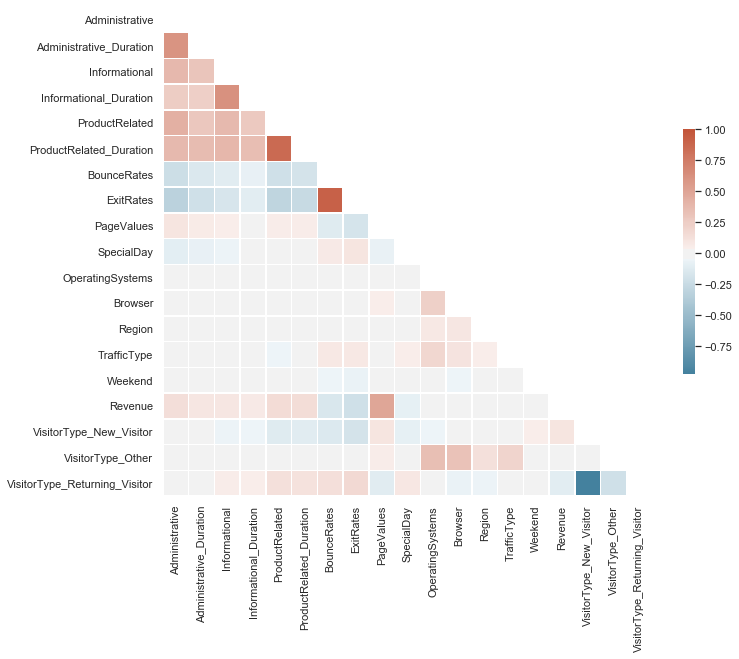

In [17]:
f, ax = plt.subplots(figsize=(11, 9))


# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

This correlation heatmap is easy to understand : the more the color is **red**, the more the variables are **positively 
correlated** ; the more the color is **blue**, the more the variables are **negatively correlated**.

We can see that ProducedRelated_Duration and ProducedRelated are very positively correlated; ExitRates and BounceRates too.

### 5) Correlation between the target '"Revenue' and the other attributes (except Month)

Now, we're gonna look the link between Revenue (the target) and all the other attributes.

In [18]:
print(corr.Revenue.sort_values(ascending=False))

Revenue                          1.000000
PageValues                       0.492569
ProductRelated                   0.158538
ProductRelated_Duration          0.152373
Administrative                   0.138917
VisitorType_New_Visitor          0.104136
Informational                    0.095200
Administrative_Duration          0.093587
Informational_Duration           0.070345
Weekend                          0.029295
Browser                          0.023984
VisitorType_Other                0.007715
TrafficType                     -0.005113
Region                          -0.011595
OperatingSystems                -0.014668
SpecialDay                      -0.082305
VisitorType_Returning_Visitor   -0.103843
BounceRates                     -0.150673
ExitRates                       -0.207071
Name: Revenue, dtype: float64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text xticklabel objects>)

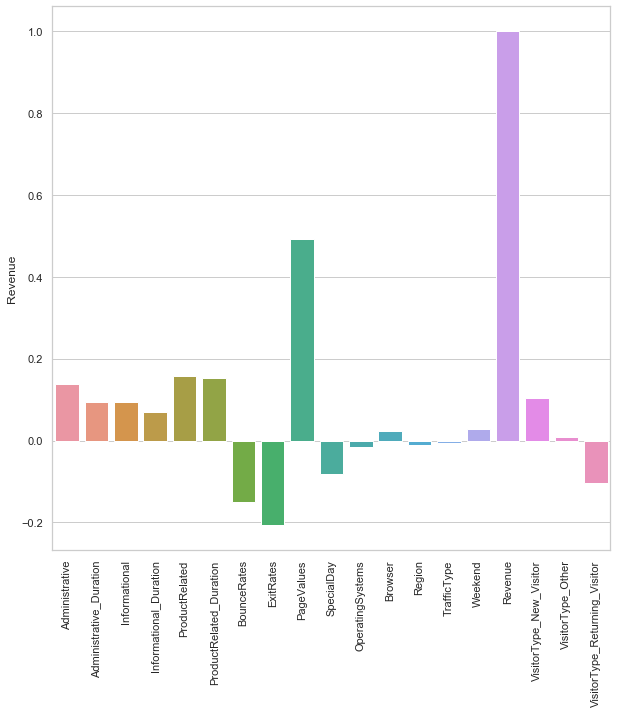

In [19]:
plt.figure(figsize=(10,10))
sns.barplot(x = corr.columns, y = corr.Revenue)
plt.xticks(rotation = 90)

It seems that Revenue is more correlated with Pages Values and ProducedRelated.

### 6) Biggest Correlations Between Pairs of attributes

In [20]:
attrs = corr.iloc[:-1,:-1] # all except target
# only important correlations and not auto-correlations
threshold = 0.5
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]) \
    .unstack().dropna().to_dict()

unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), columns=['attribute pair', 'correlation'])
# sorted by absolute value
unique_important_corrs = unique_important_corrs.loc[
    abs(unique_important_corrs['correlation']).argsort()[::-1]]
unique_important_corrs

,attribute pair,correlation
3,"(BounceRates, ExitRates)",0.913004
2,"(ProductRelated, ProductRelated_Duration)",0.860927
0,"(Informational, Informational_Duration)",0.618955
1,"(Administrative, Administrative_Duration)",0.601583


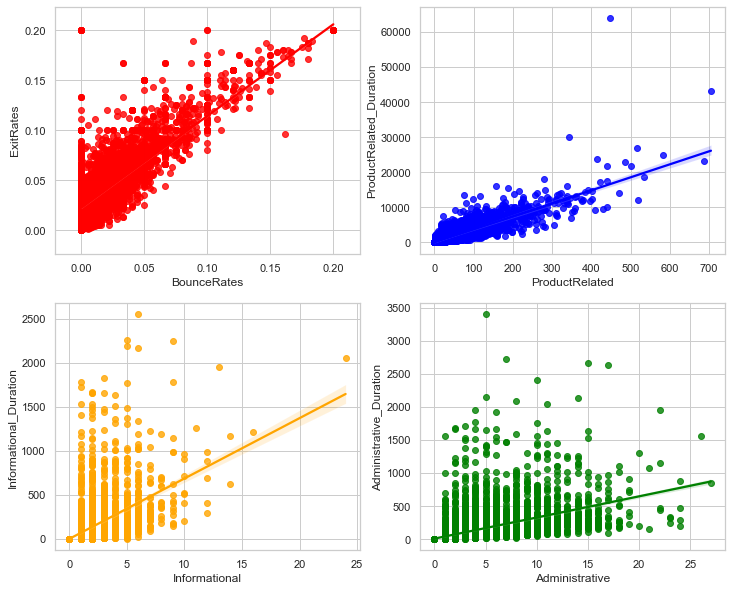

In [21]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
sns.regplot(data= data_shop, x = 'BounceRates',y='ExitRates',color='red')
plt.subplot(2,2,2)
sns.regplot(data= data_shop, x = 'ProductRelated',y='ProductRelated_Duration',color='blue')
plt.subplot(2,2,3)
sns.regplot(data= data_shop, x = 'Informational',y='Informational_Duration',color='orange')
plt.subplot(2,2,4)
sns.regplot(data= data_shop, x = 'Administrative',y='Administrative_Duration',color='green')

As we said earlier, the biggest correlations are between BounceRates with ExitRates, and ProductRelated with ProductRelated_Duration. We can cleary see the correlations in the plots !

Correlation between Informational with Informational_Duration and Administrative with Administrative_Duration exists, but are less significant.

### On categorical variables

### 7) Revenue depending on Month

We're gonna see the repartion of Revenue with each Month.

Text(0.5, 1.0, 'Number of Visitors for each Month')

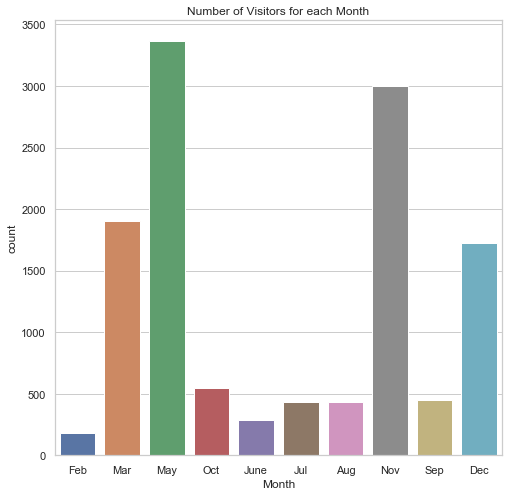

In [22]:
plt.figure(figsize=(8,8))
sns.countplot(data_shop.Month)
plt.title("Number of Visitors for each Month")

Text(0.5, 1.0, 'Number of Visitors for each Month hue with Revenue')

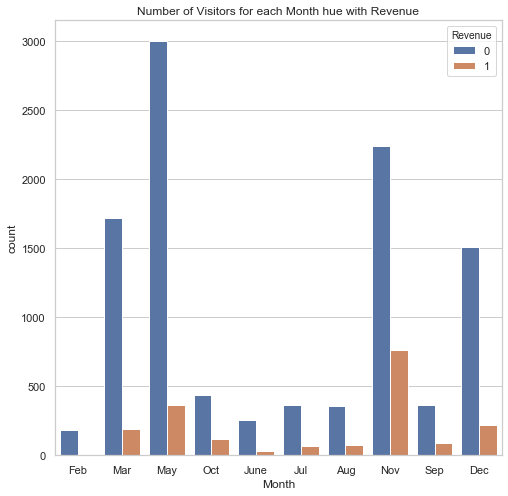

In [23]:
plt.figure(figsize=(8,8))
sns.countplot(data_shop.Month,hue= data_shop.Revenue)
plt.title("Number of Visitors for each Month hue with Revenue")

This graph is intersting, because we see that May is the month where there was the biggest number of customer, but it is
in November (the second bigger) that there was the biggest number of bought.

### 8) Revenue depending on Visitor Type

Text(0.5, 1.0, 'Number of Different type of Visitors')

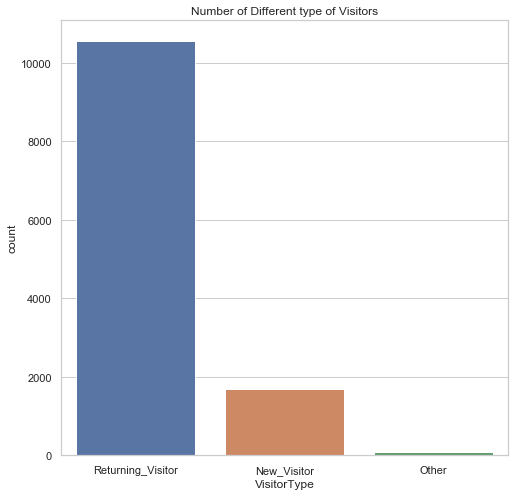

In [24]:
plt.figure(figsize=(8,8))
sns.countplot(data_shop.VisitorType)
plt.title("Number of Different type of Visitors")

Text(0.5, 1.0, 'Number of Different type of Visitors hue with Revenue')

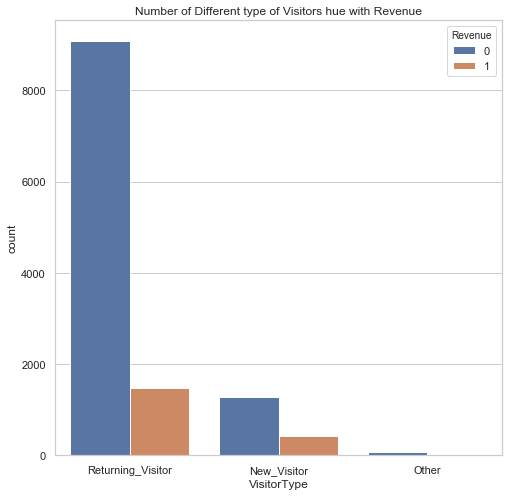

In [25]:
plt.figure(figsize=(8,8))
sns.countplot(data_shop.VisitorType,hue=data_shop.Revenue)
plt.title("Number of Different type of Visitors hue with Revenue")

This graph is not very interesting, because we see that the proportions between 0 and 1 in Revenue are quite the same even if the customer is a Returning visitor or a New visitor.


## Machine Learning

Let's go for the ML ! First we clear our dataset to begin the ML study.

In [26]:
data_shop = pd.read_csv("online_shoppers_intention.csv",sep=",")
data_shop.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [27]:
data_shop['Revenue'] = data_shop['Revenue']*1
data_shop['Weekend'] = data_shop['Weekend']*1
data_shop.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0


In [28]:
data_shop = pd.get_dummies(data_shop,columns=['Month','VisitorType','Browser','OperatingSystems','Region','TrafficType','Weekend'])
data_shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 76 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  int64  
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  int64  
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  Revenue                        12330 non-null  int32  
 11  Month_Aug                      12330 non-null  uint8  
 12  Month_Dec                      12330 non-null 

After processing our Data like we did before, we're gonna scaled it !

In [29]:
data_shop_target = data_shop['Revenue']
data_shop_attributes = data_shop.drop(columns=['Revenue'])
scaler = StandardScaler()
data_shop_scaled = StandardScaler().fit_transform(data_shop_attributes)
print(data_shop_scaled)
col_names = list(data_shop.columns)
col_names.pop(15)
print(col_names)
data_shop_final = pd.DataFrame(data=data_shop_scaled, columns=col_names)

data_shop_final

[[-0.69699296 -0.4571914  -0.3964779  ... -0.12775161  0.55055169
  -0.55055169]
 [-0.69699296 -0.4571914  -0.3964779  ... -0.12775161  0.55055169
  -0.55055169]
 [-0.69699296 -0.4571914  -0.3964779  ... -0.12775161  0.55055169
  -0.55055169]
 ...
 [-0.69699296 -0.4571914  -0.3964779  ... -0.12775161 -1.81635987
   1.81635987]
 [ 0.50722805 -0.03291592 -0.3964779  ... -0.12775161  0.55055169
  -0.55055169]
 [-0.69699296 -0.4571914  -0.3964779  ... -0.12775161 -1.81635987
   1.81635987]]
['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Revenue', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep', 'VisitorType_New_Visitor', 'VisitorType_Other', 'VisitorType_Returning_Visitor', 'Browser_1', 'Browser_2', 'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6', 'Browser_7', 'Browser_8', 'Brow

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,Weekend_0,Weekend_1
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,...,-0.252318,-0.032488,-0.055601,-0.0156,-0.009006,-0.02849,-0.037157,-0.127752,0.550552,-0.550552
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,...,-0.252318,-0.032488,-0.055601,-0.0156,-0.009006,-0.02849,-0.037157,-0.127752,0.550552,-0.550552
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,...,-0.252318,-0.032488,-0.055601,-0.0156,-0.009006,-0.02849,-0.037157,-0.127752,0.550552,-0.550552
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,...,-0.252318,-0.032488,-0.055601,-0.0156,-0.009006,-0.02849,-0.037157,-0.127752,0.550552,-0.550552
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,...,-0.252318,-0.032488,-0.055601,-0.0156,-0.009006,-0.02849,-0.037157,-0.127752,-1.816360,1.816360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.206173,0.363075,-0.396478,-0.244931,0.478227,0.307822,-0.310366,-0.288966,0.342125,-0.308821,...,-0.252318,-0.032488,-0.055601,-0.0156,-0.009006,-0.02849,-0.037157,-0.127752,-1.816360,1.816360
12326,-0.696993,-0.457191,-0.396478,-0.244931,-0.601062,-0.380957,-0.457683,-0.447364,-0.317178,-0.308821,...,-0.252318,-0.032488,-0.055601,-0.0156,-0.009006,-0.02849,-0.037157,-0.127752,-1.816360,1.816360
12327,-0.696993,-0.457191,-0.396478,-0.244931,-0.578577,-0.528063,1.261014,0.897093,-0.317178,-0.308821,...,3.963246,-0.032488,-0.055601,-0.0156,-0.009006,-0.02849,-0.037157,-0.127752,-1.816360,1.816360
12328,0.507228,-0.032916,-0.396478,-0.244931,-0.376210,-0.443536,-0.457683,-0.453140,-0.317178,-0.308821,...,-0.252318,-0.032488,-0.055601,-0.0156,-0.009006,-0.02849,-0.037157,-0.127752,0.550552,-0.550552


And for the study, we're gonna split in in two differents data set:
- one for the training
- one for the testing

In [30]:
train_X,test_X,train_y,test_y = train_test_split(data_shop_final, data_shop_target, random_state=88, train_size=0.2)

### 1) Gaussian NB

Our first model is the **Gaussian Naive Bayes**.

In [31]:
model_gauss = GaussianNB()         
model_gauss.fit(train_X, train_y) 
predi_y_gauss = model_gauss.predict(test_X)

In [32]:
accu_gauss = accuracy_score(test_y,predi_y_gauss)
accu_gauss 

0.2663219789132198

The accuracy of our model is very low ; this model is not adapted to  our study at all.

In [33]:
confu_gauss = confusion_matrix(y_true = test_y,y_pred =predi_y_gauss)
confu_gauss = pd.DataFrame(data=confu_gauss, columns=['False', 'True'], index=['real_False','real_True'])
confu_gauss

,False,True
real_False,1100,7221
real_True,16,1527


### 2) Logistic Regression

Our second model is the **Logistic Regression**.

In [34]:
model_regression = LogisticRegression()
model_regression.fit(train_X, train_y)
pred_y = model_regression.predict(test_X)

In [35]:
accuracy_score(test_y, pred_y)

0.8788523925385239

The accuracy of this model is quite good. Let's see with a **GridSearch how we can increase it by tuning the hyperparameters.**

In [36]:
grid_values = {'C': [0.1,0.2,0.4,0.6,0.8,1,1.2]}
model_lr_grid = GridSearchCV(model_regression, param_grid=grid_values,scoring='accuracy')
model_lr_grid

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.2, 0.4, 0.6, 0.8, 1, 1.2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [37]:
model_lr_grid.fit(train_X, train_y)
print(model_lr_grid.best_params_)
print(model_lr_grid.best_score_)

{'C': 0.1}
0.8848346486437657


We can see that our best parameter is C = 0.1 ; it gives us an accuracy of 0.885 !

We can plot to see the changements :

Text(0, 0.5, 'Accuracy')

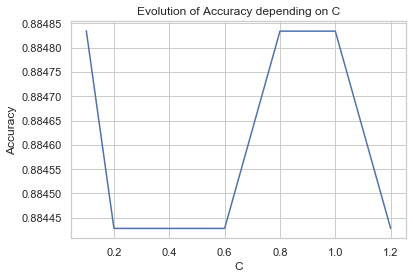

In [39]:
data_score_grid_lr = pd.DataFrame.from_dict(model_lr_grid.cv_results_)
plt.plot(data_score_grid_lr['param_C'], data_score_grid_lr['mean_test_score'])
plt.title('Evolution of Accuracy depending on C')
plt.xlabel('C')
plt.ylabel('Accuracy')

Let's look at the confusion matrix of the model with the best estimators.

In [40]:
best_model_regression = LogisticRegression(C=0.1)
best_model_regression.fit(train_X, train_y)
best_pred_y_reg = best_model_regression.predict(test_X)
confu_lr = confusion_matrix(y_true = test_y,y_pred =best_pred_y_reg)
confu_lr = pd.DataFrame(data=confu_lr, columns=['False', 'True'], index=['real_False','real_True'])
confu_lr

,False,True
real_False,8160,161
real_True,1038,505


### 3) KNN Method

Our third model is the **KNN Method**.

We're gonna look for the best n :

In [41]:
# n_neighbors is the hyperparameter
n_neighbors_list = np.arange(1,12)
scores = []
for n in n_neighbors_list:
    model_knn = KNeighborsClassifier(n_neighbors=n)
    model_knn.fit(train_X, train_y)
    y_model_knn = model_knn.predict(test_X)
    scores.append(accuracy_score(test_y, y_model_knn))

Text(0, 0.5, 'score')

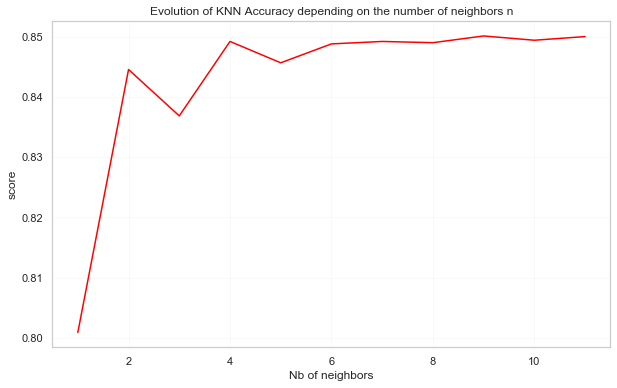

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_list, scores, color='red')
plt.grid(alpha=0.1)
plt.title('Evolution of KNN Accuracy depending on the number of neighbors n')
plt.xlabel('Nb of neighbors')
plt.ylabel('score')

In [43]:
maxi_knn = max(scores)
print('Best accuracy :', maxi_knn)
print('This max is obtain with nb_neighbors =',scores.index(maxi_knn) + 1)

Best accuracy : 0.8501622060016221
This max is obtain with nb_neighbors = 9


We see that we obtain the best accurcay with a number of neighbors equal to 9.

But there are **other parameters to tune if we want to increase the accuracy of a KNN model.**

Let's launch a GridSearch.

In [44]:
grid_param_knn = {
    'n_neighbors': [3,5,7,9,11,19],
    'weights':['uniform','distance'],
    'metric':['euclidean','manhattan']
}

gs_knn = GridSearchCV(KNeighborsClassifier(),
                     grid_param_knn,
                     verbose=1,
                     cv=4,
                     n_jobs=-1
                     )

gs_knn_results = gs_knn.fit(train_X,train_y)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    3.3s finished


Text(0, 0.5, 'Accuracy')

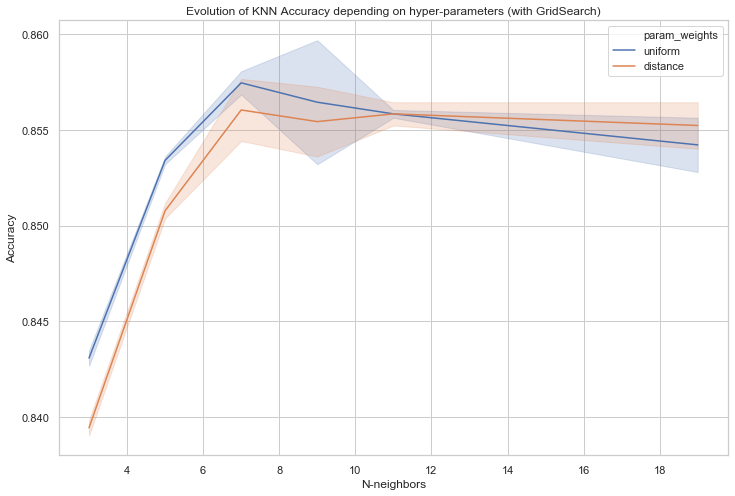

In [45]:
plt.figure(figsize=(12,8))
data_score_grid_knn = pd.DataFrame.from_dict(gs_knn_results.cv_results_)
sns.lineplot(data_score_grid_knn['param_n_neighbors'], 
             data_score_grid_knn['mean_test_score'],
             hue=data_score_grid_knn['param_weights'])
plt.title('Evolution of KNN Accuracy depending on hyper-parameters (with GridSearch)')
plt.xlabel('N-neighbors')
plt.ylabel('Accuracy')

In [46]:
print('Best accuracy :', gs_knn_results.best_score_)
print('This max is obtain with these estimators :',gs_knn_results.best_estimator_)

Best accuracy : 0.8596936896167042
This max is obtain with these estimators : KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')


So the best estimators are :

- algorithm='auto'
- leaf_size=30
- metric='manhattan'
- metric_params=None
- n_jobs=None 
- n_neighbors=9
- p=2
- weights='uniform'

Let's look at the confusion matrix of the model with the best estimators.

In [47]:
best_model_knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')
best_model_knn.fit(train_X, train_y)
best_predi_y_knn = best_model_knn.predict(test_X)
confu_knn = confusion_matrix(y_true = test_y,y_pred =best_predi_y_knn)
confu_knn = pd.DataFrame(data=confu_knn , columns=['False', 'True'], index=['real_False','real_True'])
confu_knn

,False,True
real_False,8286,35
real_True,1462,81


### 4) Decision Tree

Our fourth model is the **Decision Tree**.

In [48]:
model_tree = DecisionTreeClassifier(random_state = 88)
model_tree.fit(train_X, train_y)

predi_tree = model_tree.predict(test_X)
accuracy_score(predi_tree, test_y)

0.8587793998377939

Let's tune the hyperparameters.

In [49]:
param_grid_tree = {
    'max_depth': [1,2,3,4,5,6,7,8,9,10],
    'min_samples_leaf': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.08,0.1]
}

gs_tree = GridSearchCV(estimator = DecisionTreeClassifier(random_state = 88), 
                       param_grid = param_grid_tree, scoring = 'accuracy', cv = 7)


In [50]:
gs_tree_results = gs_tree.fit(train_X,train_y)

In [51]:
print(gs_tree_results.best_score_)
print(gs_tree_results.best_params_)
print(gs_tree_results.best_estimator_)

0.8990218351054045
{'max_depth': 5, 'min_samples_leaf': 0.01}
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.01, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=88, splitter='best')


So the best estimaotor for our Decision Tree are :
- max_depth = 5
- min_samples_leaf = 0.01
- ccp_alpha=0.0,
- class_weight=None,
- criterion='gini'
- max_depth=5
- max_features=None 
- max_leaf_nodes=None
- min_impurity_decrease=0.0 
- min_impurity_split=None
- min_samples_leaf=0.01 
- min_samples_split=2
- min_weight_fraction_leaf=0.0
- presort='deprecated'
- random_state=88
- splitter='best'

In [52]:
data_score_grid_tree = pd.DataFrame.from_dict(gs_tree_results.cv_results_)
data_score_grid_tree.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003704,0.000451,0.000570,0.000493,1,0.01,"{'max_depth': 1, 'min_samples_leaf': 0.01}",0.915014,0.892351,0.866477,0.909091,0.886364,0.846591,0.863636,0.882789,0.023231,59
1,0.003847,0.000349,0.000712,0.000450,1,0.02,"{'max_depth': 1, 'min_samples_leaf': 0.02}",0.915014,0.892351,0.866477,0.909091,0.886364,0.846591,0.863636,0.882789,0.023231,59
2,0.003704,0.000451,0.000712,0.000451,1,0.03,"{'max_depth': 1, 'min_samples_leaf': 0.03}",0.915014,0.892351,0.866477,0.909091,0.886364,0.846591,0.863636,0.882789,0.023231,59
3,0.003847,0.000349,0.000570,0.000494,1,0.04,"{'max_depth': 1, 'min_samples_leaf': 0.04}",0.915014,0.892351,0.866477,0.909091,0.886364,0.846591,0.863636,0.882789,0.023231,59
4,0.003562,0.000493,0.000712,0.000451,1,0.05,"{'max_depth': 1, 'min_samples_leaf': 0.05}",0.915014,0.892351,0.866477,0.909091,0.886364,0.846591,0.863636,0.882789,0.023231,59


Let's look at the confusion matrix of the model with the best estimators.

In [53]:
best_model_tree = DecisionTreeClassifier(random_state = 88,max_depth= 5, min_samples_leaf= 0.01,
                                        criterion='gini', min_samples_split=2,splitter='best',presort='deprecated')
best_model_tree.fit(train_X, train_y)

best_predi_tree = best_model_tree.predict(test_X)
confu_tree = confusion_matrix(y_true = test_y,y_pred =best_predi_tree )
confu_tree = pd.DataFrame(data=confu_tree, columns=['False', 'True'], index=['real_False','real_True'])
confu_tree

,False,True
real_False,7917,404
real_True,669,874


### 5) Random Forest 

Our fifth and final model is the **Random Forest**.

In [54]:
model_rf = RandomForestClassifier(random_state = 88)
model_rf.fit(train_X, train_y)

predi_rf = model_rf.predict(test_X)
accuracy_score(predi_rf, test_y)

0.8915247364152473

Let's tune the hyperparameters.

In [64]:
param_grid_rf = {
    'max_features': [0.1,0.2,0.3,0.5,0.8,1,2],
    'min_samples_leaf': [1,2,3, 4, 5,6,7],
    'min_samples_split': [8, 10, 12,15,17,20],
    'n_estimators': [100, 200, 300, 400,500]
}
rf = RandomForestClassifier()
gs_rf = GridSearchCV(estimator = rf, param_grid = param_grid_rf, 
                          cv = 4, n_jobs = -1, verbose = 2,scoring='accuracy')

In [65]:
gs_rf_results = gs_rf.fit(train_X,train_y)

Fitting 4 folds for each of 1470 candidates, totalling 5880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 353 tasks      | elapsed:   40.3s
[Parallel(n_jobs=-1)]: Done 636 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1001 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1446 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1973 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 2580 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 3269 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 4038 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 4889 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 5820 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 5880 out of 5880 | elapsed: 15.0min finished


In [73]:
print(gs_rf_results.best_score_)
print(gs_rf_results.best_params_)

0.8998380569997264
{'max_features': 0.2, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 400}


So the best parameters for our Random Forest are :
- max_features = 0.2 
- min_samples_leaf = 3 
- min_samples_split = 10 
- n_estimators = 400

In [67]:
data_score_grid_rf = pd.DataFrame.from_dict(gs_rf_results.cv_results_)
data_score_grid_rf.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.216679,0.002481,0.015210,0.001296,0.1,1,8,100,"{'max_features': 0.1, 'min_samples_leaf': 1, '...",0.901135,0.881686,0.899351,0.887987,0.892539,0.008044,641
1,0.435351,0.012547,0.029425,0.004277,0.1,1,8,200,"{'max_features': 0.1, 'min_samples_leaf': 1, '...",0.901135,0.883306,0.900974,0.878247,0.890915,0.010296,818
2,0.639695,0.005079,0.039644,0.000827,0.1,1,8,300,"{'max_features': 0.1, 'min_samples_leaf': 1, '...",0.902755,0.881686,0.904221,0.876623,0.891321,0.012309,784
3,0.862726,0.012031,0.055352,0.003193,0.1,1,8,400,"{'max_features': 0.1, 'min_samples_leaf': 1, '...",0.902755,0.878444,0.905844,0.876623,0.890917,0.013443,809
4,1.104719,0.025050,0.070438,0.005501,0.1,1,8,500,"{'max_features': 0.1, 'min_samples_leaf': 1, '...",0.907618,0.883306,0.900974,0.878247,0.892536,0.012125,676


Let's look at the confusion matrix of the model with the best estimators.

In [71]:
best_model_rf = RandomForestClassifier(random_state = 88,max_features= 0.2,
                                       min_samples_leaf= 3, min_samples_split= 10,n_estimators=400)
best_model_rf.fit(train_X, train_y)

best_predi_rf = best_model_rf.predict(test_X)
confu_rf = confusion_matrix(y_true = test_y,y_pred =best_predi_rf)
confu_rf = pd.DataFrame(data=confu_rf, columns=['False', 'True'], index=['real_False','real_True'])
confu_rf

,False,True
real_False,8119,202
real_True,772,771


## Comparaison of the accuracy

Let's compare the accuracy of our five models.

In [72]:
index = ['Gaussian NB','Logistic Regression','KNN Method','Decision Tree','Random Forest']
data = [accu_gauss,model_lr_grid.best_score_ ,
     gs_knn_results.best_score_,gs_tree_results.best_score_,
     gs_rf_results.best_score_]
data_accuracy = pd.DataFrame(data = data,index = index)
data_accuracy = data_accuracy.sort_values([0])
data_accuracy = data_accuracy.rename(columns={0: "Accuracy"})
data_accuracy

,Accuracy
Gaussian NB,0.266322
KNN Method,0.859694
Logistic Regression,0.884835
Decision Tree,0.899022
Random Forest,0.899838


Text(0.5, 1.0, 'Best accuracy of the Five ML methods used (sorted)')

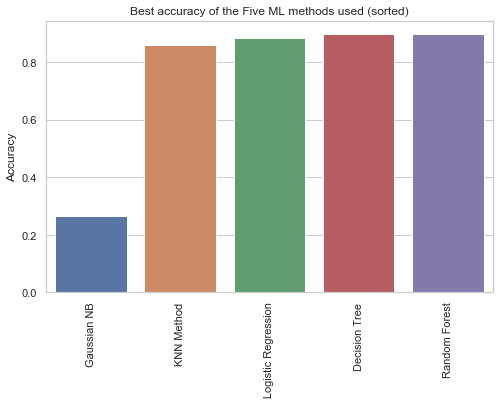

In [70]:
plt.figure(figsize=(8,5))
sns.barplot(x = data_accuracy.index, y = data_accuracy.Accuracy)
plt.xticks(rotation = 90)
plt.title("Best accuracy of the Five ML methods used (sorted)")

The best model is our Random Forest model ! We're gonna take him for our Flask API.

In [75]:
pickle.dump(best_model_rf, open('rf_customer.pkl','wb'))